In [59]:
# libraries to  be used
try:
    import pandas as pd
    import seaborn as sns
    import matplotlib.pyplot as plt
    from sklearn.tree import DecisionTreeRegressor
    from sklearn.metrics import mean_absolute_error
    from sklearn.cluster import KMeans
    import matplotlib.pyplot as plt
    print("Libraries imported successfully.")
except ImportError as e:
    print(f"Error importing libraries: {e}")

print("done")


Libraries imported successfully.
done


In [36]:
# Read the dataset into a DataFrame
traffic = pd.read_csv("website_traffic.csv")

traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Page Views        2000 non-null   int64  
 1   Session Duration  2000 non-null   float64
 2   Bounce Rate       2000 non-null   float64
 3   Traffic Source    2000 non-null   object 
 4   Time on Page      2000 non-null   float64
 5   Previous Visits   2000 non-null   int64  
 6   Conversion Rate   2000 non-null   float64
dtypes: float64(4), int64(2), object(1)
memory usage: 109.5+ KB


In [37]:
traffic_encoded = pd.get_dummies(traffic, columns=['Traffic Source'])
# The pd.get_dummies() function converts categorical variables into binary columns, 
# making them suitable for machine learning models that require numeric input. 
# This transformation helps the model understand categorical data as separate features.

In [38]:
traffic_encoded.head()

,Page Views,Session Duration,Bounce Rate,Time on Page,Previous Visits,Conversion Rate,Traffic Source_Direct,Traffic Source_Organic,Traffic Source_Paid,Traffic Source_Referral,Traffic Source_Social
0,5,11.051381,0.230652,3.890460,3,1.0,False,True,False,False,False
1,4,3.429316,0.391001,8.478174,0,1.0,False,False,False,False,True
2,4,1.621052,0.397986,9.636170,2,1.0,False,True,False,False,False
3,5,3.629279,0.180458,2.071925,3,1.0,False,True,False,False,False
4,5,4.235843,0.291541,1.960654,5,1.0,False,False,True,False,False


In [39]:
new_column_names = {
    'Traffic Source_0': 'Traffic Source_Organic',
    'Traffic Source_1': 'Traffic Source_Social',
    'Traffic Source_2': 'Traffic Source_Paid',
    'Traffic Source_3': 'Traffic Source_Referral',
    'Traffic Source_4': 'Traffic Source_Direct'
}

traffic_encoded.rename(columns=new_column_names, inplace=True)
traffic_encoded

,Page Views,Session Duration,Bounce Rate,Time on Page,Previous Visits,Conversion Rate,Traffic Source_Direct,Traffic Source_Organic,Traffic Source_Paid,Traffic Source_Referral,Traffic Source_Social
0,5,11.051381,0.230652,3.890460,3,1.0,False,True,False,False,False
1,4,3.429316,0.391001,8.478174,0,1.0,False,False,False,False,True
2,4,1.621052,0.397986,9.636170,2,1.0,False,True,False,False,False
3,5,3.629279,0.180458,2.071925,3,1.0,False,True,False,False,False
4,5,4.235843,0.291541,1.960654,5,1.0,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...
1995,1,2.724513,0.207187,1.324206,2,1.0,False,False,False,True,False
1996,3,0.392856,0.095559,3.824416,1,1.0,False,True,False,False,False
1997,4,9.899823,0.446622,1.288675,1,1.0,False,True,False,False,False
1998,3,0.393319,0.278340,5.037584,2,1.0,False,False,True,False,False


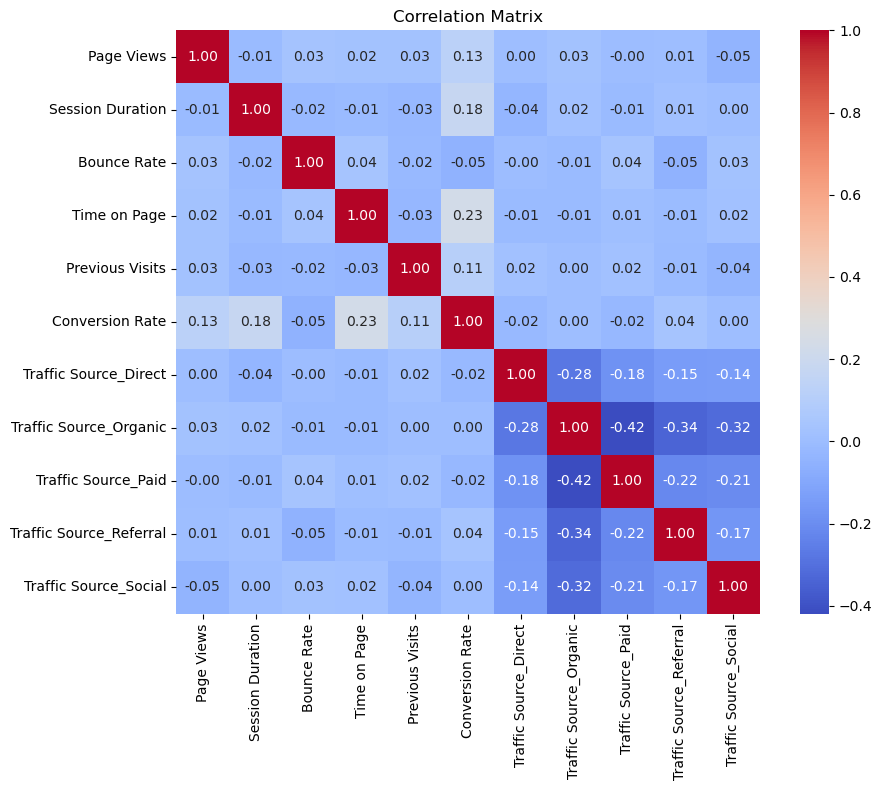

In [40]:
# Draw the corr figure
correlation_matrix = traffic_encoded.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Correlation Matrix")
plt.tight_layout()
plt.savefig("correlation_matrix.png")
plt.show()

In [41]:
# Make it into calculation
correlations = traffic_encoded.corr()['Conversion Rate'].sort_values(ascending=False)
print(f"Correlation Coefficients:\n{correlations}", )

Correlation Coefficients:
Conversion Rate            1.000000
Time on Page               0.229669
Session Duration           0.177798
Page Views                 0.126635
Previous Visits            0.109496
Traffic Source_Referral    0.036294
Traffic Source_Social      0.003685
Traffic Source_Organic     0.002654
Traffic Source_Direct     -0.017945
Traffic Source_Paid       -0.024288
Bounce Rate               -0.049051
Name: Conversion Rate, dtype: float64


In [42]:
# Define ANSI escape codes for Morandi blue color and bold text
MORANDI_BLUE = '\033[38;5;69m'  # Using a close approximation of Morandi blue
BOLD = '\033[1m'
RESET = '\033[0m'

# Print statements with formatting
print(f"{BOLD}{MORANDI_BLUE}Positive Correlation (Values between 0 and 1):{RESET}")
print(f"\n1.Time on Page (0.229669): There is a moderate positive correlation with the Conversion Rate. As the time spent on a page increases, the conversion rate tends to increase, but the relationship is not very strong.")
print(f"\n2.Session Duration (0.177798):There is a mild positive correlation. Longer session durations are slightly associated with higher conversion rates.")
print(f"\n3.Page Views (0.126635):A weak positive correlation. More page views are slightly associated with a higher conversion rate.")
print(f"\n4.Previous Visits (0.109496): A very weak positive correlation. More previous visits have a small positive association with the conversion rate.")

print(f"\n{BOLD}{MORANDI_BLUE}Very Weak or No Correlation (Values close to 0):{RESET}")
print(f"\n1.Traffic Source_Referral (0.036294):Almost no correlation. The type of traffic source being a referral has very little impact on the conversion rate.")
print(f"\n2.Traffic Source_Social (0.003685):Very weak positive correlation. Social traffic has almost no impact on the conversion rate.")
print(f"\n3.Traffic Source_Organic (0.002654):Very weak positive correlation. Organic traffic has a negligible effect on the conversion rate.")

print(f"\n{BOLD}{MORANDI_BLUE}Negative Correlation (Values between -1 and 0):{RESET}")
print(f"\n1.Traffic Source_Direct (-0.017945):Very weak negative correlation. Direct traffic slightly decreases the conversion rate, but the effect is very minimal.")
print(f"\n2.Traffic Source_Paid (-0.024288):Very weak negative correlation. Paid traffic slightly decreases the conversion rate, though the relationship is not significant.")
print(f"\n3.Bounce Rate (-0.049051):Very weak negative correlation. A higher bounce rate is slightly associated with a lower conversion rate, but the effect is minimal.")


Positive Correlation (Values between 0 and 1):

1.Time on Page (0.229669): There is a moderate positive correlation with the Conversion Rate. As the time spent on a page increases, the conversion rate tends to increase, but the relationship is not very strong.

2.Session Duration (0.177798):There is a mild positive correlation. Longer session durations are slightly associated with higher conversion rates.

3.Page Views (0.126635):A weak positive correlation. More page views are slightly associated with a higher conversion rate.

4.Previous Visits (0.109496): A very weak positive correlation. More previous visits have a small positive association with the conversion rate.

Very Weak or No Correlation (Values close to 0):

1.Traffic Source_Referral (0.036294):Almost no correlation. The type of traffic source being a referral has very little impact on the conversion rate.

2.Traffic Source_Social (0.003685):Very weak positive correlation. Social traffic has almost no impact on the convers

In [43]:
positive_correlations = correlations[correlations > 0]
selected_features = positive_correlations.index.drop('Conversion Rate')
print(f"Selected Features:  {', '.join(selected_features)}")

Selected Features:  Time on Page, Session Duration, Page Views, Previous Visits, Traffic Source_Referral, Traffic Source_Social, Traffic Source_Organic


In [44]:
X = traffic_encoded[selected_features]
X

,Time on Page,Session Duration,Page Views,Previous Visits,Traffic Source_Referral,Traffic Source_Social,Traffic Source_Organic
0,3.890460,11.051381,5,3,False,False,True
1,8.478174,3.429316,4,0,False,True,False
2,9.636170,1.621052,4,2,False,False,True
3,2.071925,3.629279,5,3,False,False,True
4,1.960654,4.235843,5,5,False,False,False
...,...,...,...,...,...,...,...
1995,1.324206,2.724513,1,2,True,False,False
1996,3.824416,0.392856,3,1,False,False,True
1997,1.288675,9.899823,4,1,False,False,True
1998,5.037584,0.393319,3,2,False,False,False


In [45]:
y = traffic_encoded['Conversion Rate']
y

0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
1995    1.0
1996    1.0
1997    1.0
1998    1.0
1999    1.0
Name: Conversion Rate, Length: 2000, dtype: float64

In [46]:
traffic_model = DecisionTreeRegressor(random_state=42)
traffic_model.fit(X, y)

DecisionTreeRegressor(random_state=42)

In [47]:
print("Making predicyions based on the following feature selected: ")
print(X)

Making predicyions based on the following feature selected: 
      Time on Page  Session Duration  Page Views  Previous Visits  \
0         3.890460         11.051381           5                3   
1         8.478174          3.429316           4                0   
2         9.636170          1.621052           4                2   
3         2.071925          3.629279           5                3   
4         1.960654          4.235843           5                5   
...            ...               ...         ...              ...   
1995      1.324206          2.724513           1                2   
1996      3.824416          0.392856           3                1   
1997      1.288675          9.899823           4                1   
1998      5.037584          0.393319           3                2   
1999      5.186908          0.882638           3                3   

      Traffic Source_Referral  Traffic Source_Social  Traffic Source_Organic  
0                       False  

In [48]:
predictions = traffic_model.predict(X)
print(f"Predicted Value of tbe conversion rate:\n{traffic_model.predict(X)}")

Predicted Value of tbe conversion rate:
[1. 1. 1. ... 1. 1. 1.]


In [49]:
error = mean_absolute_error(y, predictions)
print(f"The error is {round(error, 6)}")

The error is 0.0


In [50]:
from sklearn.model_selection import train_test_split

train_X, val_X, train_y, val_y = train_test_split(X, y, test_size=0.2, random_state=42)

traffic_model = DecisionTreeRegressor(random_state=42)
traffic_model.fit(train_X, train_y)
predictions = traffic_model.predict(val_X)

mae = mean_absolute_error(val_y, predictions)
print("Mean Absolute Error:", mae)

Mean Absolute Error: 0.027188997283884686


In [51]:
print(f"{BOLD}{MORANDI_BLUE}Result:{RESET}\nAn MAE of 0.0272 of Decision Tree Regression model suggests that, on average, the predictions are quite close to the actual values. It indicates reasonable accuracy,")

Result:
An MAE of 0.0272 of Decision Tree Regression model suggests that, on average, the predictions are quite close to the actual values. It indicates reasonable accuracy,


In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

# One-hot encode categorical features
traffic_encoded = pd.get_dummies(traffic, columns=['Traffic Source'])

# Separate features and target variable
X = traffic_encoded.drop('Conversion Rate', axis=1)
y = traffic_encoded['Conversion Rate']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)


Mean Absolute Error: 0.031633855428908224


In [53]:
print(f"{BOLD}{MORANDI_BLUE}Error Magnitude:{RESET} \nThe MAE for the Decision Tree Regression model is 0.0272, which is slightly lower than the 0.0316 MAE for the Linear Regression model.\nThis means that, the Decision Tree model's predictions are closer to the actual values compared to the Linear Regression model.")

Error Magnitude: 
The MAE for the Decision Tree Regression model is 0.0272, which is slightly lower than the 0.0316 MAE for the Linear Regression model.
This means that, the Decision Tree model's predictions are closer to the actual values compared to the Linear Regression model.


In [54]:
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Page Views        2000 non-null   int64  
 1   Session Duration  2000 non-null   float64
 2   Bounce Rate       2000 non-null   float64
 3   Traffic Source    2000 non-null   object 
 4   Time on Page      2000 non-null   float64
 5   Previous Visits   2000 non-null   int64  
 6   Conversion Rate   2000 non-null   float64
dtypes: float64(4), int64(2), object(1)
memory usage: 109.5+ KB


In [55]:
traffic = traffic.drop('Traffic Source', axis=1)
traffic

,Page Views,Session Duration,Bounce Rate,Time on Page,Previous Visits,Conversion Rate
0,5,11.051381,0.230652,3.890460,3,1.0
1,4,3.429316,0.391001,8.478174,0,1.0
2,4,1.621052,0.397986,9.636170,2,1.0
3,5,3.629279,0.180458,2.071925,3,1.0
4,5,4.235843,0.291541,1.960654,5,1.0
...,...,...,...,...,...,...
1995,1,2.724513,0.207187,1.324206,2,1.0
1996,3,0.392856,0.095559,3.824416,1,1.0
1997,4,9.899823,0.446622,1.288675,1,1.0
1998,3,0.393319,0.278340,5.037584,2,1.0


C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(
C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(
C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(
C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows wi

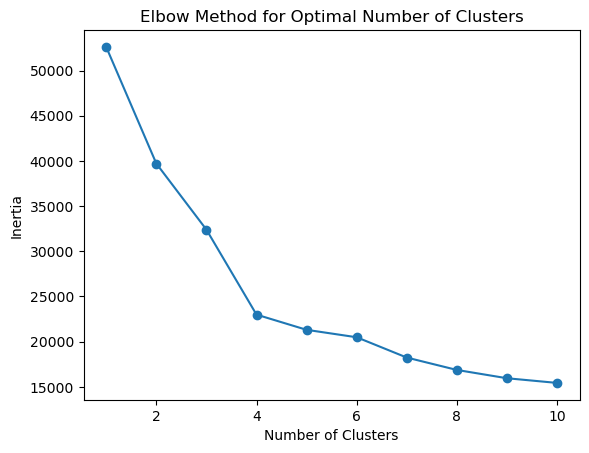

In [69]:
try:
    # Get the number of samples
    n_samples = traffic.shape[0]

    # Define a reasonable upper limit for the number of clusters
    max_clusters = min(n_samples, 10)  # For example, use 10 or less if n_samples is less than 10

    clustercol = []

    # Iterate over the range of clusters
    for i in range(1, max_clusters + 1):
        km = KMeans(n_clusters=i, random_state=0)  # Set random_state for reproducibility
        km.fit(traffic)  # Use fit method instead of fit_predict to calculate inertia
        clustercol.append(km.inertia_)  # Append inertia to the list

    # Create the plot
    fig, ax = plt.subplots()
    ax.plot(range(1, max_clusters + 1), clustercol, '-o')  # Marker = '-o' for circle
    ax.set_xlabel('Number of Clusters')
    ax.set_ylabel('Inertia')
    ax.set_title('Elbow Method for Optimal Number of Clusters')
    plt.show()

except ValueError as e:
    print(f"Error: Value error in KMeans - {e}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

In [67]:
try:
    # Initialize KMeans with the specified number of clusters
    kmeans = KMeans(n_clusters=4, random_state=40)  # random_state for reproducibility
    
    # Fit the model to the data
    kmeans.fit(traffic)
    
    # Predict the cluster labels
    traffic['clusters'] = kmeans.predict(traffic)
    
    # Calculate the mean of each feature for each cluster
    cluster_means = traffic.groupby('clusters').mean()
    
except ValueError as e:
    print(f"Error: Value error in KMeans - {e}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(


In [74]:
cluster_means

,Page Views,Session Duration,Bounce Rate,Time on Page,Previous Visits,Conversion Rate
clusters,,,,,,
0,3.504011,1.660852,0.283993,2.795658,1.918449,0.960986
1,4.655786,8.481593,0.280010,3.344620,1.845697,0.999628
2,4.878481,2.235852,0.291896,8.508824,1.946835,1.000000
3,7.276923,2.039064,0.283546,2.837700,2.175000,0.987382


In [76]:
cluster_means_reset = cluster_means.reset_index()
print(cluster_means_reset.head())

   clusters  Page Views  Session Duration  Bounce Rate  Time on Page  \
0         0    3.504011          1.660852     0.283993      2.795658   
1         1    4.655786          8.481593     0.280010      3.344620   
2         2    4.878481          2.235852     0.291896      8.508824   
3         3    7.276923          2.039064     0.283546      2.837700   

   Previous Visits  Conversion Rate  
0         1.918449         0.960986  
1         1.845697         0.999628  
2         1.946835         1.000000  
3         2.175000         0.987382  


In [79]:
print(cluster_means_reset.columns)

Index(['clusters', 'Page Views', 'Session Duration', 'Bounce Rate',
       'Time on Page', 'Previous Visits', 'Conversion Rate'],
      dtype='object')


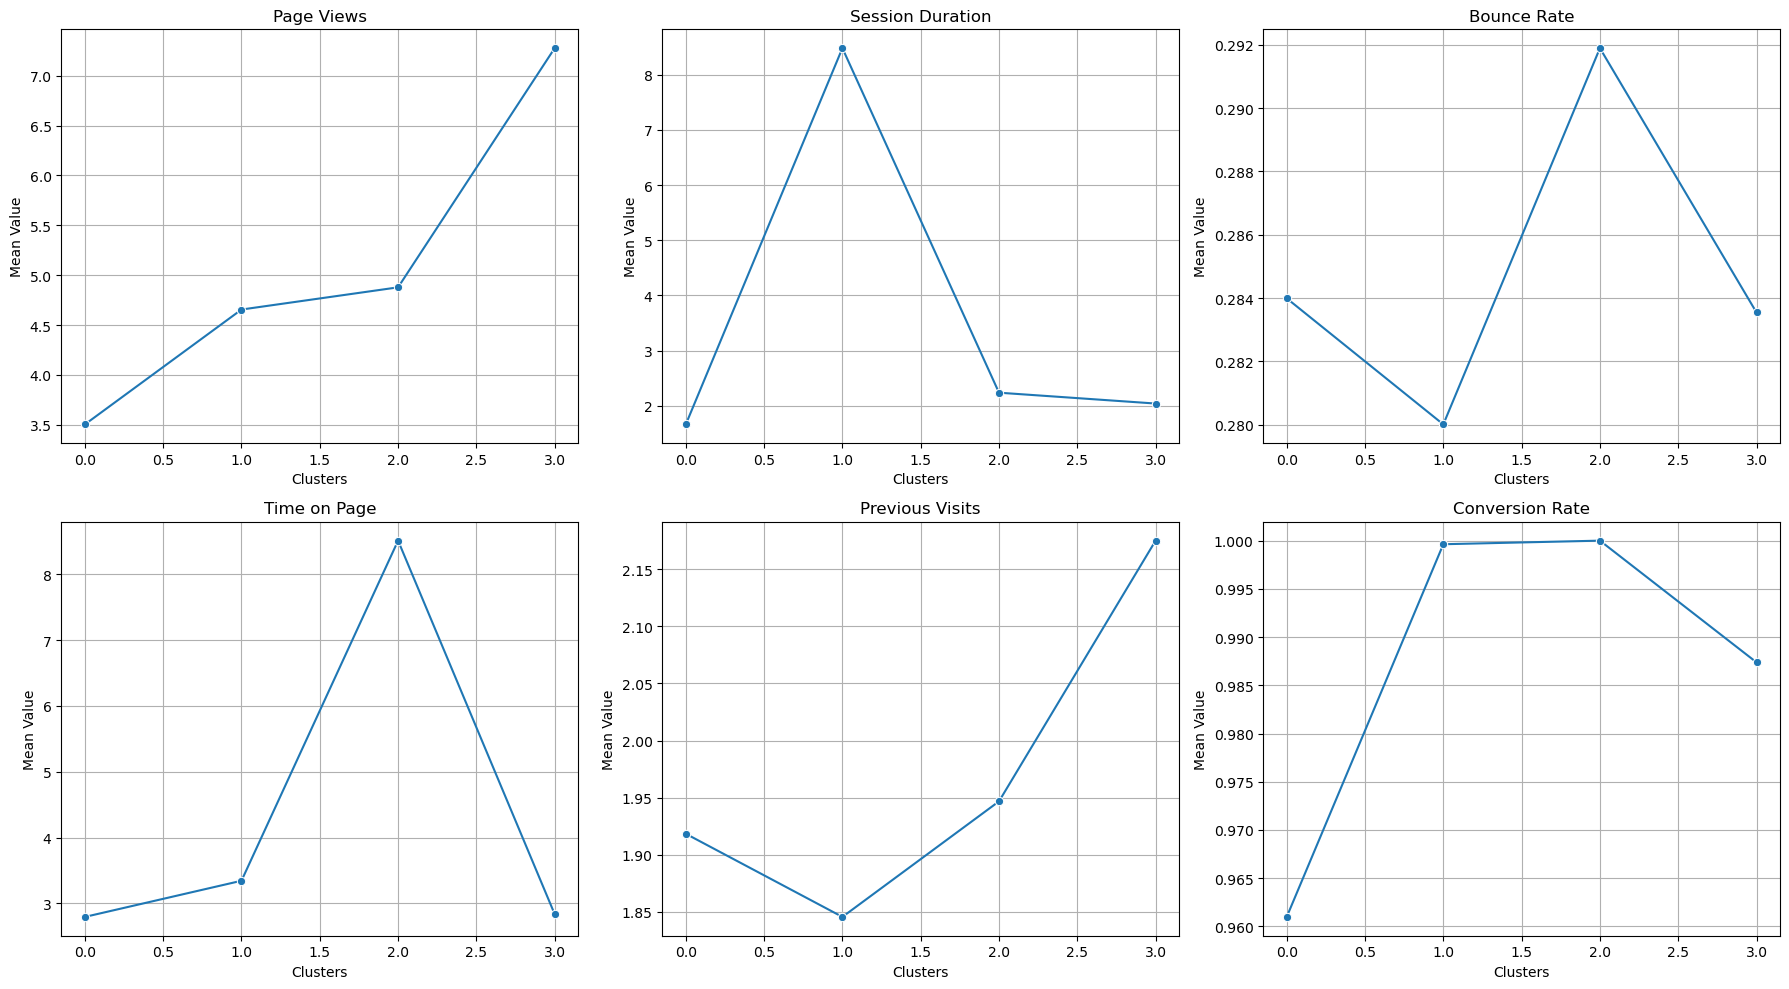

In [83]:
# Determine the number of features to plot
features = [feature for feature in cluster_means_reset.columns if feature != 'clusters']
num_features = len(features)

# Create subplots
fig, axes = plt.subplots(nrows=(num_features + 2) // 3, ncols=3, figsize=(18, 5 * ((num_features + 2) // 3)))
axes = axes.flatten()  # Flatten the 2D array of axes to iterate easily

# Plot each feature in its subplot
for idx, feature in enumerate(features):
    sns.lineplot(data=cluster_means_reset, x='clusters', y=feature, ax=axes[idx], marker='o')
    axes[idx].set_title(feature)
    axes[idx].set_xlabel('Clusters')
    axes[idx].set_ylabel('Mean Value')
    axes[idx].grid(True)

# Remove any unused subplots
for ax in axes[num_features:]:
    fig.delaxes(ax)

plt.tight_layout()
plt.savefig("cluster.png")
plt.show()

In [87]:
print(f"{BOLD}{MORANDI_BLUE}Cluster 0:{RESET} \nHas the lowest average session duration and page views, but the bounce rate is relatively low, and the conversion rate is high. Users in this cluster spend a good amount of time on the page and have a high conversion rate, suggesting that even brief visits are effective.")

print(f"{BOLD}{MORANDI_BLUE}Cluster 1:{RESET} \nShows a higher session duration and page views compared to others. The bounce rate is similar to Cluster 0, but the conversion rate is extremely high. Users in this cluster are highly engaged, spending more time on the site and achieving a very high conversion rate.")

print(f"{BOLD}{MORANDI_BLUE}Cluster 2:{RESET} \nUsers view more pages on average and spend a lot of time on each page. Although session duration is shorter compared to Cluster 1, the time on page is very high. This cluster has the highest conversion rate, indicating that deep engagement with content leads to conversions.")

print(f"{BOLD}{MORANDI_BLUE}Cluster 3:{RESET} \nHas the highest average page views but the shortest session duration. Despite the short time on each page, the bounce rate and conversion rate are also high, suggesting that users interact with multiple pages quickly but still achieve a high conversion rate.")


Cluster 0: 
Has the lowest average session duration and page views, but the bounce rate is relatively low, and the conversion rate is high. Users in this cluster spend a good amount of time on the page and have a high conversion rate, suggesting that even brief visits are effective.
Cluster 1: 
Shows a higher session duration and page views compared to others. The bounce rate is similar to Cluster 0, but the conversion rate is extremely high. Users in this cluster are highly engaged, spending more time on the site and achieving a very high conversion rate.
Cluster 2: 
Users view more pages on average and spend a lot of time on each page. Although session duration is shorter compared to Cluster 1, the time on page is very high. This cluster has the highest conversion rate, indicating that deep engagement with content leads to conversions.
Cluster 3: 
Has the highest average page views but the shortest session duration. Despite the short time on each page, the bounce rate and conversion 